In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5)

data = pd.read_csv('data/coupons.csv')

In [4]:
data.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
6070,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Female,50plus,Single,...,gt8,1~3,less1,less1,1,0,0,0,1,0
896,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,21,Single,...,less1,4~8,1~3,less1,1,1,1,0,1,1
3604,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Female,26,Single,...,less1,less1,1~3,less1,1,0,0,0,1,0
4685,No Urgent Place,Kid(s),Sunny,80,2PM,Restaurant(<20),2h,Male,31,Married partner,...,never,less1,less1,never,1,0,0,0,1,0
3860,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,21,Single,...,4~8,4~8,4~8,never,1,1,1,0,1,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [9]:
data['income_min'] = data['income'].str.replace('$', '',).str.split(' - ').str[0]
data['income_min'] = data['income_min'].str.replace(' or More', '',)
data['income_min'] = data['income_min'].str.replace('Less than 12500', '0',)

In [11]:
dist_dir = data.groupby(['income_min', 'Y'])[['toCoupon_GEQ5min',
                                              'toCoupon_GEQ15min',
                                              'toCoupon_GEQ25min',
                                              'direction_same',
                                              'direction_opp']].agg('sum')
dist_dir

toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  \
income_min Y                                                           
0          0               424                258                 66   
           1               618                300                 68   
100000     0               732                449                121   
           1              1004                527                 82   
12500      0               779                454                127   
           1              1052                543                 92   
25000      0               819                505                135   
           1              1194                626                 99   
37500      0               787                466                120   
           1              1018                546                105   
50000      0               671                419                101   
           1               988                522                 89   
62500      0               400                257                 71   
           1               446                230                 32   
75000      0               443                256                 59   
           1               414                230                 42   
87500      0               419                264                 63   
           1               476                270                 39   

              direction_same  direction_opp  
income_min Y                                 
0          0             110            314  
           1             165            453  
100000     0             142            590  
           1             214            790  
12500      0             159            620  
           1             228            824  
25000      0             168            651  
           1             265            929  
37500      0             194            593  
           1             217            801  
50000      0             116            555  
           1             203            785  
62500      0              83            317  
           1             103            343  
75000      0              89            354  
           1              89            325  
87500      0              77            342  
           1             102            374

In [13]:
dist_dir = dist_dir.reset_index()
dist_dir['income_min'] = dist_dir['income_min'].astype(int)
dist_dir = dist_dir.sort_values(by='income_min')
dist_dir

,income_min,Y,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,0,0,424,258,66,110,314
1,0,1,618,300,68,165,453
4,12500,0,779,454,127,159,620
5,12500,1,1052,543,92,228,824
7,25000,1,1194,626,99,265,929
6,25000,0,819,505,135,168,651
9,37500,1,1018,546,105,217,801
8,37500,0,787,466,120,194,593
10,50000,0,671,419,101,116,555
11,50000,1,988,522,89,203,785


In [15]:
data.groupby('age').agg('sum')[['Y']]

,Y
age,
21,1587
26,1525
31,1114
36,706
41,626
46,395
50plus,910
below21,347


In [17]:
data['age'] = data['age'].str.replace('plus', '')
data['age'] = data['age'].str.replace('below21', '16').astype(int)
data['age']

0        21
1        21
2        21
3        21
4        21
         ..
12679    26
12680    26
12681    26
12682    26
12683    26
Name: age, Length: 12684, dtype: int32

<Axes: xlabel='age', ylabel='Count'>

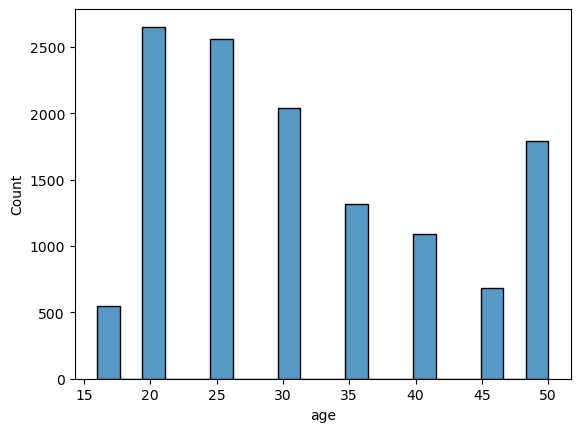

In [19]:
sns.histplot(data=data['age'])

In [21]:
data.dropna()
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,income_min
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,0,0,0,1,1,37500
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,0,0,0,1,0,37500
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,1,37500
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,0,37500
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,0,37500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,1~3,4~8,1~3,1,0,0,1,0,1,75000
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,1~3,4~8,1~3,1,0,0,0,1,1,75000
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,1~3,4~8,1~3,1,0,0,1,0,0,75000
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,1~3,4~8,1~3,1,1,1,0,1,0,75000


<Axes: xlabel='passanger', ylabel='Count'>

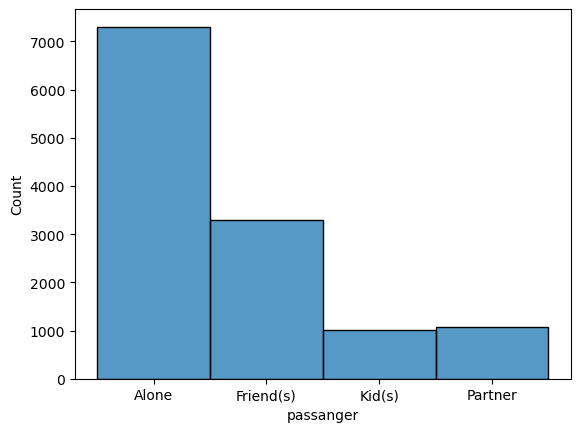

In [23]:
sns.histplot(data['passanger'])

In [25]:
bar = data.query('coupon == "Bar"')
bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,income_min
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,0,37500
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,0,0,1,0,1,37500
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,1,0,1,0,37500
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,62500
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,1,0,1,62500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,75000
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,75000
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,75000
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,75000


In [29]:
bar = data.query('coupon == "Bar"')
bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,1,0,1,0


In [33]:
#bar['bar_int'] = bar['Bar'].str.replace('never', '-1')
#bar['bar_int'] = bar['bar_int'].str.replace('less', '0')
#bar['bar_int'] = bar['bar_int'].str.replace('1~3', '1')
#bar['bar_int'] = bar['bar_int'].str.replace('4~8', '4')
#bar['bar_int'] = bar['bar_int'].str.replace('gt', '')

bar['bar_int'] = bar['Bar'].str.replace('never', '-1').replace('less', '0').replace('1~3', '1').replace('4~8', '4').replace('gt', '')
bar

C:\Users\Brian\AppData\Local\Temp\ipykernel_11500\3885721099.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar['bar_int'] = bar['Bar'].str.replace('never', '-1').replace('less', '0').replace('1~3', '1').replace('4~8', '4').replace('gt', '')


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,bar_int
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0,-1
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,1,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,0,0,1,0,-1
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,1,0,1,0,-1
